In [1]:
import math
ToaDoChoTruoc = [[1.5,2.0], 
                 [2.5,3.0], 
                 [3.0,4.0], 
                 [5.0,7.0],   
                 [3.5,5.0], 
                 [4.5,5.5], 
                 [3.5,4.5]] 
class ToaDo:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

In [2]:
class TrongTam:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y

In [3]:
trongtam = [] #Arraylist chứa các trọng tâm
s = [] #Arraylist để lưu đỉnh của trọng tâm
def KhoiTaoTrongTam():
    s1 = int(input("Nhập đỉnh trọng tâm thứ 1: "))
    s2 = int(input("Nhập đỉnh trọng tâm thứ 2: "))
    s.append(s1) #Thêm đỉnh s1 vào s
    s.append(s2) #Thêm đỉnh s2 vào s
    trongtam.append(TrongTam(ToaDoChoTruoc[s[0]][0], ToaDoChoTruoc[s[0]][1])) #thêm tọa độ trọng tâm 1 vào trongtam
    trongtam.append(TrongTam(ToaDoChoTruoc[s[1]][0], ToaDoChoTruoc[s[1]][1])) #thêm tọa độ trọng tâm 2 vào trongtam
    
    print("Các trọng tâm được chọn ngẫu nhiên là: ")
    print("(", trongtam[0].get_x(), ", ", trongtam[0].get_y(), ")")
    print("(", trongtam[1].get_x(), ", ", trongtam[1].get_y(), ")")
    print()
    return

In [4]:
data = [] #Arraylist lưu lại các điểm sau khi đã được khởi tạo cluster
def KhoiTaoToaDo():
    print("Tọa độ các điểm ban đầu : ")
    for i in range(len(ToaDoChoTruoc)): #ToaDoChoTruoc có length = 7
        newPoint = ToaDo(ToaDoChoTruoc[i][0], ToaDoChoTruoc[i][1])
        if(i == s[0]):                   
            newPoint.set_cluster(0)      #Tạo cluster ban đầu cho trọng tâm 1
        elif(i == s[1]):                 
            newPoint.set_cluster(1)      #Tạo cluster ban đầu cho trọng tâm 2
        else:
            newPoint.set_cluster(None)   #Tạo cluster ban đầu cho các điểm tọa độ không phải là trọng tâm
        data.append(newPoint)
    for j in range(len(ToaDoChoTruoc)):
         print("Tọa độ(", data[j].get_x(), ", ", data[j].get_y(), ") có Cluster:", data[j].get_cluster())
    print()
    return

In [5]:
def TinhKhoangCanh(Xtrongtam, x, Ytrongtam, y):
    return math.sqrt(math.pow((Xtrongtam - x), 2) + math.pow((Ytrongtam - y), 2))

In [6]:
def TinhTrongTam():
    TongToaDoX1 = 0
    TongToaDoY1 = 0
    TongToaDoX2 = 0
    TongToaDoY2 = 0
    SoDiemToaDo1 = 0
    SoDiemToaDo2 = 0
    for j in range(2):                                 
        for k in range(len(data)):
            if(data[k].get_cluster() == j):           #Xét các điểm tọa độ thuộc cùng 1 cluster 
                if(j == 0):
                    TongToaDoX1 += data[k].get_x()   #Tổng các tọa độ x trong cùng 1 cluster
                    TongToaDoY1 += data[k].get_y()   #Tổng các tọa độ y trong cùng 1 cluster
                    SoDiemToaDo1 += 1                #Nếu có các điểm thuộc cùng 1 cluster sẽ tăng lên 1
                    if(SoDiemToaDo1 > 0):                              
                        trongtam[j].set_x(TongToaDoX1 / SoDiemToaDo1)  #Tính trung bình cộng tọa độ x của trọng tâm
                        trongtam[j].set_y(TongToaDoY1 / SoDiemToaDo1)  #Tính trung bình cộng tọa độ y của trọng tâm
                elif(j == 1):
                    TongToaDoX2 += data[k].get_x()
                    TongToaDoY2 += data[k].get_y()
                    SoDiemToaDo2 += 1
                    if(SoDiemToaDo2 > 0):
                        trongtam[j].set_x(TongToaDoX2 / SoDiemToaDo2)
                        trongtam[j].set_y(TongToaDoY2 / SoDiemToaDo2)
    print("Trọng tâm 1: (",trongtam[0].get_x(),", ",trongtam[0].get_y(),")")
    print("Trọng tâm 2: (",trongtam[1].get_x(),", ",trongtam[1].get_y(),")")
    print()
    return

In [7]:
def CapNhatCluster():
    print("Tọa độ sau khi cập nhật lại:")
    for i in range(len(ToaDoChoTruoc)):
        KhoangCachNganNhat = 1000       #Giả sử cho trước khoảng cách ngắn nhất từ các điểm tọa độ đến trọng tâm là 1000
        Cluster = 0                     #Khởi tạo Cluster ban đầu là 0
        for j in range(2):
            KhoangCach = TinhKhoangCanh(trongtam[j].get_x(), data[i].get_x(), trongtam[j].get_y(), data[i].get_y())
            if(KhoangCach < KhoangCachNganNhat): #So sánh khoảng cách từ các tọa độ đến trọng tâm   
                KhoangCachNganNhat = KhoangCach  #Nếu nhỏ hơn sẽ cập nhật lại khoảng cách
                Cluster = j                      #Cluster tại điểm sẽ bằng Cluster trọng tâm có khoảng cách gần nhất
        data[i].set_cluster(Cluster)
        if(data[i].get_cluster() is None or data[i].get_cluster() != Cluster): #Cập nhật lại Cluster
                data[i].set_cluster(Cluster)          
        print("Tọa độ(", data[i].get_x(), ", ", data[i].get_y(), ") có Cluster:", data[i].get_cluster())

In [8]:
def Kmeans():
    TinhTrongTam()
    CapNhatCluster() 
    print()
    return

In [9]:
def inKetQua():
    for i in range(2):
        print("Cluster ", i, " :")
        for j in range(len(ToaDoChoTruoc)):
            if(data[j].get_cluster() == i):
                print("(", data[j].get_x(), ", ", data[j].get_y(), ",", data[j].get_cluster(),")")
        print()
    return

In [10]:
KhoiTaoTrongTam()

Nhập đỉnh trọng tâm thứ 1: 0
Nhập đỉnh trọng tâm thứ 2: 3
Các trọng tâm được chọn ngẫu nhiên là: 
( 1.5 ,  2.0 )
( 5.0 ,  7.0 )



In [11]:
KhoiTaoToaDo()

Tọa độ các điểm ban đầu : 
Tọa độ( 1.5 ,  2.0 ) có Cluster: 0
Tọa độ( 2.5 ,  3.0 ) có Cluster: None
Tọa độ( 3.0 ,  4.0 ) có Cluster: None
Tọa độ( 5.0 ,  7.0 ) có Cluster: 1
Tọa độ( 3.5 ,  5.0 ) có Cluster: None
Tọa độ( 4.5 ,  5.5 ) có Cluster: None
Tọa độ( 3.5 ,  4.5 ) có Cluster: None



In [17]:
Kmeans() #Không xác định được số vòng lặp chạy đến khi trọng tâm không thay đổi thì dừng lại
inKetQua()

Trọng tâm 1: ( 2.3333333333333335 ,  3.0 )
Trọng tâm 2: ( 4.125 ,  5.5 )

Tọa độ sau khi cập nhật lại:
Tọa độ( 1.5 ,  2.0 ) có Cluster: 0
Tọa độ( 2.5 ,  3.0 ) có Cluster: 0
Tọa độ( 3.0 ,  4.0 ) có Cluster: 0
Tọa độ( 5.0 ,  7.0 ) có Cluster: 1
Tọa độ( 3.5 ,  5.0 ) có Cluster: 1
Tọa độ( 4.5 ,  5.5 ) có Cluster: 1
Tọa độ( 3.5 ,  4.5 ) có Cluster: 1

Cluster  0  :
( 1.5 ,  2.0 , 0 )
( 2.5 ,  3.0 , 0 )
( 3.0 ,  4.0 , 0 )

Cluster  1  :
( 5.0 ,  7.0 , 1 )
( 3.5 ,  5.0 , 1 )
( 4.5 ,  5.5 , 1 )
( 3.5 ,  4.5 , 1 )



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [19]:
#Khởi tạo 7 điểm tọa độ ban đầu cho trước và số Cluster
cov = [[1, 0], [0, 1]]
N = 300                  #Với mỗi điểm tọa độ sẽ có 300 điểm lân cận
X0 = np.random.multivariate_normal(ToaDoChoTruoc[0], cov, N)
X1 = np.random.multivariate_normal(ToaDoChoTruoc[1], cov, N)
X2 = np.random.multivariate_normal(ToaDoChoTruoc[2], cov, N)
X3 = np.random.multivariate_normal(ToaDoChoTruoc[3], cov, N)
X4 = np.random.multivariate_normal(ToaDoChoTruoc[4], cov, N)
X5 = np.random.multivariate_normal(ToaDoChoTruoc[5], cov, N)
X6 = np.random.multivariate_normal(ToaDoChoTruoc[6], cov, N)
X = np.concatenate((X0, X1, X2, X3, X4, X5, X6), axis = 0)   
cluster = 2                                                       
original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N + [4]*N + [5]*N + [6]*N).T

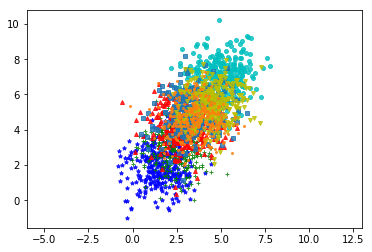

In [20]:
#Hiển thị các điểm tọa độ lên đồ thị Kmeans
def DoThiKmeans(X, label):
    K = np.amax(label) + 1 
    X0 = X[label == 0, :]        
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    X5 = X[label == 5, :]
    X6 = X[label == 6, :]
    
#Xác định hình dạng cho các tọa độ
    plt.plot(X0[:, 0], X0[:, 1], 'b*', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'g+', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'r^', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 's', markersize = 4, alpha = .8)
    plt.plot(X5[:, 0], X5[:, 1], 'yv', markersize = 4,alpha = .8)
    plt.plot(X6[:, 0], X6[:, 1], '.', markersize = 4,alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()
    
DoThiKmeans(X, original_label)

In [21]:
def KhoiTaoTrongTam(X, cluster):
    return X[np.random.choice(X.shape[0], cluster, replace=False)]
def TinhKhoangCach(X, TrongTam):
    D = cdist(X, TrongTam)               #tính khoảng cách giữa các tọa độ với trọng tâm
    return np.argmin(D, axis = 1)        #Trả về khooảng cách ngắn nhất

def CapNhatTrongTam(X, labels, cluster):
    TrongTam = np.zeros((cluster, X.shape[1])) 
    for k in range(cluster):
        Xk = X[labels == k, :]
        TrongTam[k,:] = np.mean(Xk, axis = 0)
    return TrongTam

def XetDieuKienTrongTam(TrongTam, TrongTamMoi):    
    return (set([tuple(a) for a in TrongTam]) == set([tuple(a) for a in TrongTamMoi]))  #So sánh

In [22]:
def kmeans(X, cluster):
    TrongTam = [KhoiTaoTrongTam(X, cluster)]
    labels = []
    it = 0 
    while True:
        labels.append(TinhKhoangCach(X, TrongTam[-1]))          #Tính khoảng cách giữa các điểm và trọng tâm
        TrongTamMoi = CapNhatTrongTam(X, labels[-1], cluster)   #Cập nhật lại trọng tâm mới
        if XetDieuKienTrongTam(TrongTam[-1], TrongTamMoi):      #Thuật toán sẽ dừng khi trọng tâm không thay đổi
            break
        TrongTam.append(TrongTamMoi)
        it += 1
    return (TrongTam, labels, it)

[[2.24437332 2.9461836 ]
 [4.29873487 5.73555845]]


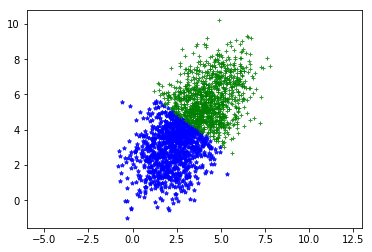

In [23]:
#Đồ thị Kmeans sau khi cập nhật với số Cluster = 2
(TrongTam, labels, it) = kmeans(X, cluster)
print(TrongTam[-1])
DoThiKmeans(X, labels[-1])

[[4.29768635 5.73442905]
 [2.24347736 2.94462232]]


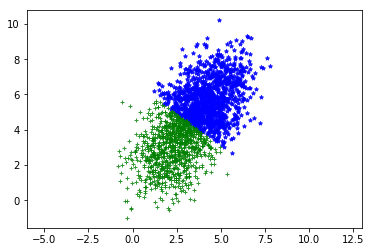

In [24]:
#Đồ thị Kmeans sử dụng hàm có sẵn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=0).fit(X)
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
DoThiKmeans(X, pred_label)